In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


In [2]:
data = pd.read_excel(r"C:\Users\kriti\kriti python\Hourly Patient Data.xlsx")

In [3]:
data['Time'] = pd.to_datetime(data['Time'])

In [4]:
data.set_index('Time', inplace=True)

In [5]:
data.drop(columns=['ESI 2', 'ESI 1', 'ESI 4', 'ESI 5'], inplace=True)

In [6]:
esi1_daily = data['ESI 3'].resample('D').sum()

In [7]:
esi1_daily_df = esi1_daily.reset_index()

In [8]:
esi1_daily_df.columns = ['Date', 'ESI 3']

In [9]:
print(esi1_daily_df)

           Date  ESI 3
0    2017-01-01    116
1    2017-01-02    111
2    2017-01-03    138
3    2017-01-04    159
4    2017-01-05    133
...         ...    ...
1456 2020-12-27    107
1457 2020-12-28    124
1458 2020-12-29    125
1459 2020-12-30    121
1460 2020-12-31    115

[1461 rows x 2 columns]


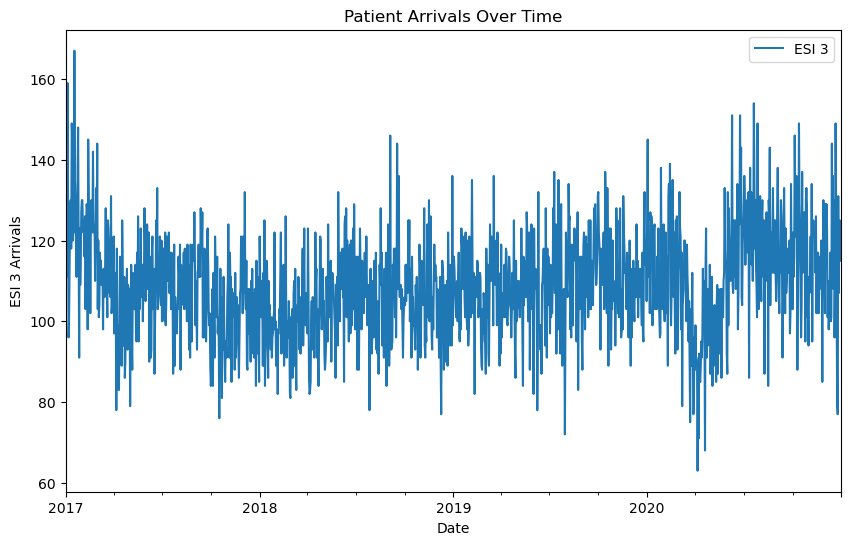

In [10]:
esi1_daily_df.plot(x='Date', y='ESI 3', figsize=(10, 6))
plt.title('Patient Arrivals Over Time')
plt.xlabel('Date')
plt.ylabel('ESI 3 Arrivals')
plt.show()

In [11]:
train_size = int(len(esi1_daily_df) * 0.9)  
train, test = esi1_daily_df.iloc[:train_size], esi1_daily_df.iloc[train_size:]

In [12]:
model = auto_arima(train['ESI 3'], seasonal=False, max_p=5, max_d=2, max_q=5, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train['ESI 3'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10195.814, Time=0.99 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10913.412, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10619.758, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10198.176, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10911.412, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10194.006, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10195.287, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10195.629, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10195.812, Time=0.65 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=10195.994, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10196.052, Time=0.31 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10197.812, Time=1.17 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=10192.022, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=10193.303, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [13]:
n_periods = len(test)
forecast_values = model.predict(n_periods=n_periods)

In [14]:
print("Forecasted values:")
print(forecast_values)

Forecasted values:
1314    119.973949
1315    120.727515
1316    120.195315
1317    120.571177
1318    120.305727
           ...    
1456    120.415601
1457    120.415601
1458    120.415601
1459    120.415601
1460    120.415601
Length: 147, dtype: float64


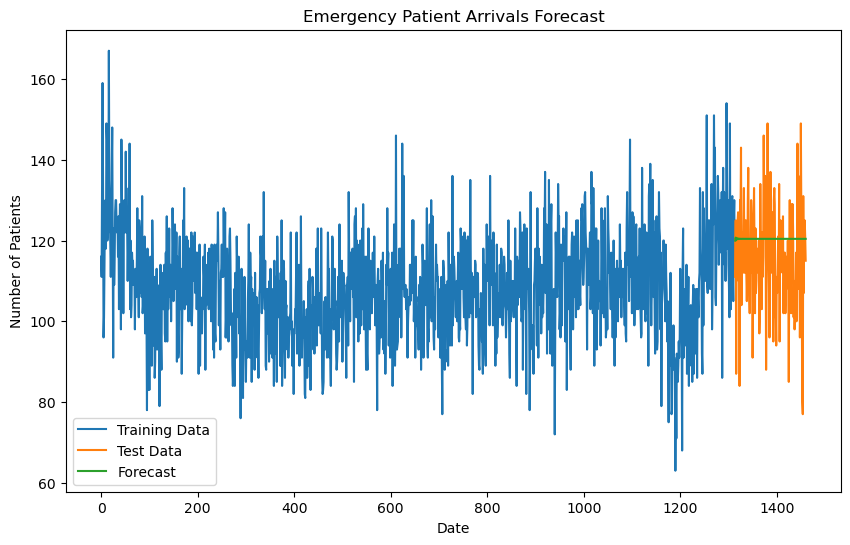

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['ESI 3'], label='Training Data')
plt.plot(test.index, test['ESI 3'], label='Test Data')
plt.plot(test.index, forecast_values, label='Forecast')
plt.title('Emergency Patient Arrivals Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

In [16]:
def mean_absolute_percentage_error(actual, forecast):
  
   
    actual, forecast = np.array(actual), np.array(forecast)
    return np.mean(np.abs((actual - forecast) / actual)) * 100

In [17]:
mape = mean_absolute_percentage_error(test['ESI 3'], forecast_values)
print("MAPE:", mape)

MAPE: 10.45015608889469


In [18]:
def root_mean_squared_error(actual, forecast):
    
    actual, forecast = np.array(actual), np.array(forecast)
    return np.sqrt(np.mean((actual - forecast) ** 2))

In [19]:
rmse = root_mean_squared_error(test['ESI 3'], forecast_values)
print("RMSE:", rmse)

RMSE: 14.279750326712051


In [20]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


mae = mean_absolute_error(test['ESI 3'], forecast_values)
print("MAE:", mae)

MAE: 11.23040033246783
